In [35]:
#import libraries to use for my analysis and visualizations. Then read the dataset.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score
%matplotlib inline
df=pd.read_csv('Churn_clean_d212.csv') 

In [36]:
#seperate columns Techie and Item 8 from the dataset to use for KMEANS
kmdf=df[['Techie','Item8']]

In [37]:
#Change Techie from categorical Yes/No to Integer 1/2
kmdf = kmdf.replace(to_replace = 'Yes', value = 1)
kmdf = kmdf.replace(to_replace = 'No', value = 0) 
kmdf.head()

,Techie,Item8
0,0,4
1,1,4
2,1,3
3,1,3
4,0,5


In [38]:
kmdf.to_csv('D212Task1Final.csv')

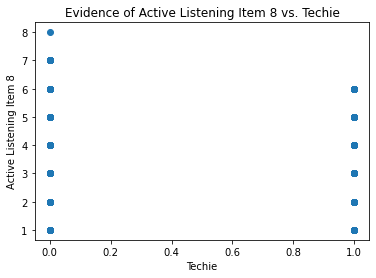

In [39]:
#Scatterplot
#Source (Transforming features for better clusterings: Python)
T=kmdf.iloc[:,0].values
I=kmdf.iloc[:,1].values
plt.scatter(T,I)
plt.ylabel('Active Listening Item 8')
plt.xlabel('Techie')
plt.title('Evidence of Active Listening Item 8 vs. Techie')
plt.show()

In [40]:
#View values
X=kmdf.iloc[:,[0,1]].values
X

array([[0, 4],
       [1, 4],
       [1, 3],
       ...,
       [0, 5],
       [0, 4],
       [0, 1]], dtype=int64)

In [41]:
# Split into training and test set
X_train,X_test = train_test_split(X, test_size = 0.2, random_state=1)
print(X_train.shape, X_test.shape)

(8000, 2) (2000, 2)


In [42]:
#Source (Transforming features for better clusterings: Python)
# Create a KMeans, fit model, determine and print labels
model = KMeans(n_clusters=2)
model.fit(X_train)
labels = model.predict(X_train)
print(labels)

[0 1 0 ... 1 1 1]


In [43]:
#combine label column to dataframe
df=np.concatenate((X_train, labels[:,None]),axis=1) 

In [44]:
#Determine Inertia. Lower values are better.
print(model.inertia_)

3690.0509854932934


Text(0.5, 1.0, 'Active Listening Item 8 vs. Techie w/labels colored')

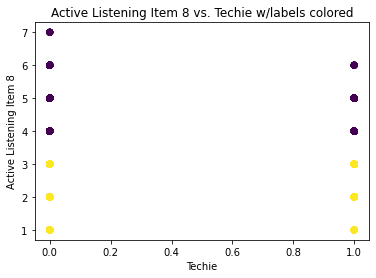

In [45]:
#Create Scatterplot and color labels
X=X_train[:,0]
Y=X_train[:,1]
plt.scatter(X,Y,c=labels)
plt.ylabel('Active Listening Item 8')
plt.xlabel('Techie')
plt.title('Active Listening Item 8 vs. Techie w/labels colored')

In [46]:
#Label columns=['Techie','Item 8','Labels'] and view values
df1=pd.DataFrame({'Techie':X,'Item 8':Y,'Labels':labels})
print (df1)

      Techie  Item 8  Labels
0          0       4       0
1          0       2       1
2          0       5       0
3          0       5       0
4          0       4       0
...      ...     ...     ...
7995       0       3       1
7996       0       5       0
7997       0       1       1
7998       0       3       1
7999       1       1       1

[8000 rows x 3 columns]


In [47]:
#Source (Transforming features for better clusterings: Python)
#Evaluate model using crosstab
ct=pd.crosstab(df1['Labels'],df1['Techie'])
ct 

Techie,0,1
Labels,,
0,3294,650
1,3343,713


In [48]:
#Source (Transforming features for better clusterings: Python)
#Evaluate model using crosstab
ci=pd.crosstab(df1['Labels'],df1['Item 8'])
ci

Item 8,1,2,3,4,5,6,7
Labels,,,,,,,
0,0,0,0,2709,1064,158,13
1,162,1131,2763,0,0,0,0


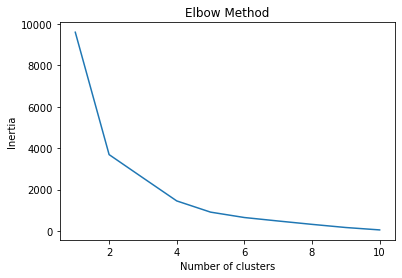

In [49]:
#Source(Towards Data Science)
#Plotting inertia using the elbow method to determine ideal number of clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X_train)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

[1 2 4 ... 2 0 2]


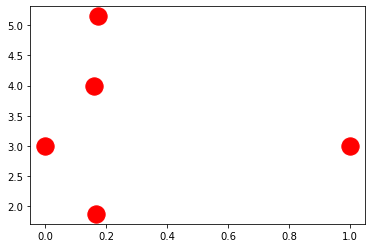

In [50]:
#Source (Transforming features for better clusterings: Python)
# Create a KMeans, fit model, determine and print labels
model = KMeans(n_clusters=5)
model.fit(X_train)
labels = model.predict(X_train)
wcss.append(model.inertia_)
print(labels)
 
#plt.scatter(X_train[:,0],X_train[:,1])
plt.scatter(model.cluster_centers_[:, 0], model.cluster_centers_[:, 1], s=300, c='red')
plt.show()

In [51]:
#Determine Inertia. Lower values are better.
print(model.inertia_)

1046.9260762405795


Text(0.5, 1.0, 'Active Listening Item 8 vs. Techie w/labels colored')

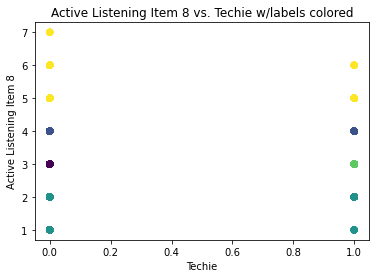

In [52]:
#Creating a scatterplot and color labels 
X=X_train[:,0]
Y=X_train[:,1]
plt.scatter(X,Y,c=labels)
plt.ylabel('Active Listening Item 8')
plt.xlabel('Techie')
plt.title('Active Listening Item 8 vs. Techie w/labels colored')

In [53]:
#Add labels to columns=['Techie','Item 8','Labels'] 
df2=pd.DataFrame({'Techie':X,'Item 8':Y,'Labels':labels})
print (df2)

      Techie  Item 8  Labels
0          0       4       1
1          0       2       2
2          0       5       4
3          0       5       4
4          0       4       1
...      ...     ...     ...
7995       0       3       0
7996       0       5       4
7997       0       1       2
7998       0       3       0
7999       1       1       2

[8000 rows x 3 columns]


In [54]:
#Source (Transforming features for better clusterings: Python)
#evaluating labels using the crosstab method
ci=pd.crosstab(df2['Labels'],df2['Item 8'])
ci

Item 8,1,2,3,4,5,6,7
Labels,,,,,,,
0,0,0,2266,0,0,0,0
1,0,0,0,2709,0,0,0
2,162,1131,0,0,0,0,0
3,0,0,497,0,0,0,0
4,0,0,0,0,1064,158,13


In [55]:
#Source (Transforming features for better clusterings: Python)
#evaluating labels using the crosstab method
ct=pd.crosstab(df2['Labels'],df2['Techie'])
ct

Techie,0,1
Labels,,
0,2266,0
1,2274,435
2,1077,216
3,0,497
4,1020,215


In [56]:
#Determining accuracy of the model
acc=accuracy_score(labels,X)
acc

0.337625